

# Project: No Show Appointment Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 110.527 medical appointments its 14 associated . The most important one if the patient show-up or no-show to the appointment.


>Questions:




.How the partient infromation affects showing the appointment?



.

.Is receiving a SMS has an effect on showing?



.Most disease patients suffer from?


.Does age affect showing ?



.which month did most patirnts show?


.which day in the month did most patirnts show ?

In [61]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [62]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('project2.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75434 entries, 0 to 75433
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       75434 non-null  float64
 1   AppointmentID   75433 non-null  float64
 2   Gender          75433 non-null  object 
 3   ScheduledDay    75433 non-null  object 
 4   AppointmentDay  75433 non-null  object 
 5   Age             75433 non-null  float64
 6   Neighbourhood   75433 non-null  object 
 7   Scholarship     75433 non-null  float64
 8   Hipertension    75433 non-null  float64
 9   Diabetes        75433 non-null  float64
 10  Alcoholism      75433 non-null  float64
 11  Handcap         75433 non-null  float64
 12  SMS_received    75433 non-null  float64
 13  No-show         75433 non-null  object 
dtypes: float64(9), object(5)
memory usage: 8.1+ MB


In [64]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.543400e+04,7.543300e+04,75433.000000,75433.000000,75433.000000,75433.000000,75433.000000,75433.000000,75433.000000
mean,1.475787e+14,5.655208e+06,37.015444,0.098379,0.193059,0.068988,0.029987,0.021980,0.290337
std,2.562094e+14,6.619546e+04,23.074387,0.297828,0.394701,0.253436,0.170552,0.159107,0.453921
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.219576e+12,5.629842e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.166127e+13,5.664890e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.452498e+13,5.698624e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999686e+14,5.754966e+06,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [65]:
df.shape

(75434, 14)

In [66]:
#dataframe to understand the data more
df_dict=pd.DataFrame(df.dtypes,columns=['DATA_TYPES'])
df_dict['NULL']=df.isnull().sum()
df_dict['COUNTS']=df.count()
df_dict['UNIQUE_VALS']=df.nunique()

In [67]:
df_dict

,DATA_TYPES,NULL,COUNTS,UNIQUE_VALS
PatientId,float64,0,75434,46845
AppointmentID,float64,1,75433,75433
Gender,object,1,75433,2
ScheduledDay,object,1,75433,71306
AppointmentDay,object,1,75433,21
Age,float64,1,75433,101
Neighbourhood,object,1,75433,81
Scholarship,float64,1,75433,2
Hipertension,float64,1,75433,2
Diabetes,float64,1,75433,2


In [68]:
#looking for duplicate rows
df.duplicated().sum()

0



### Data Cleaning 
Cleaning Issues:






1)Droping unnecessary columns






2)Changing Datatypes

In [69]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No


Dropping PatientId	and AppointmentID

In [70]:
df.drop(['PatientId',	'AppointmentID'],axis=1,inplace=True)

In [71]:
#checking
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No


1) Changing ScheduledDay	and AppointmentDay datatypes from string to date




In [72]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

Renaming Appointment column and Schedualedcolumn


In [73]:
df=df.rename(columns={'AppointmentDay':'Appointment'})
df=df.rename(columns={'ScheduledDay':'Scheduled'})
df.head(1)

,Gender,Scheduled,Appointment,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No


Creating day and month columns

In [74]:
df['Appointment_DAY']=df['Appointment'].dt.day
df['Scheduled_DAY']=df['Scheduled'].dt.day
df['Appointment_MONTH']=df['Appointment'].dt.month
df['Scheduled_MONTH']=df['Scheduled'].dt.month
df.head()

,Gender,Scheduled,Appointment,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_DAY,Scheduled_DAY,Appointment_MONTH,Scheduled_MONTH
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,29.0,29.0,4.0,4.0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,29.0,29.0,4.0,4.0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,29.0,29.0,4.0,4.0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,29.0,29.0,4.0,4.0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,29.0,29.0,4.0,4.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75434 entries, 0 to 75433
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Gender             75433 non-null  object             
 1   Scheduled          75433 non-null  datetime64[ns, UTC]
 2   Appointment        75433 non-null  datetime64[ns, UTC]
 3   Age                75433 non-null  float64            
 4   Neighbourhood      75433 non-null  object             
 5   Scholarship        75433 non-null  float64            
 6   Hipertension       75433 non-null  float64            
 7   Diabetes           75433 non-null  float64            
 8   Alcoholism         75433 non-null  float64            
 9   Handcap            75433 non-null  float64            
 10  SMS_received       75433 non-null  float64            
 11  No-show            75433 non-null  object             
 12  Appointment_DAY    75433 non-null  float64    

Changing (0/1) columns from int to booleans

In [76]:
df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']] = df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']] .astype(bool)

In [77]:
df['No-show'].replace(['Yes', 'No'], [True, False], inplace=True)
df['No-show'].dtype

dtype('O')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75434 entries, 0 to 75433
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Gender             75433 non-null  object             
 1   Scheduled          75433 non-null  datetime64[ns, UTC]
 2   Appointment        75433 non-null  datetime64[ns, UTC]
 3   Age                75433 non-null  float64            
 4   Neighbourhood      75433 non-null  object             
 5   Scholarship        75434 non-null  bool               
 6   Hipertension       75434 non-null  bool               
 7   Diabetes           75434 non-null  bool               
 8   Alcoholism         75434 non-null  bool               
 9   Handcap            75434 non-null  bool               
 10  SMS_received       75434 non-null  bool               
 11  No-show            75433 non-null  object             
 12  Appointment_DAY    75433 non-null  float64    

EXPOLATORY DATA ANALYSIS


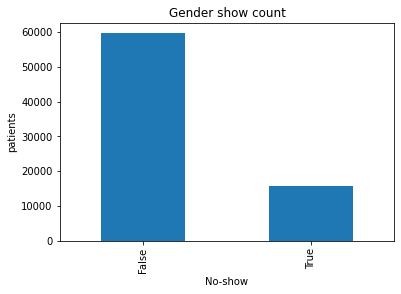

In [79]:
#plotting No-show to know how many came to the appointment and hpw many didnt
df['No-show'].value_counts().plot(kind='bar')
plt.ylabel('patients')
plt.xlabel('No-show')
plt.title('Gender show count')
plt.show()

**Most patients didnt show**


#plotting age distribution

Text(0.5, 1.0, 'Age distribution')

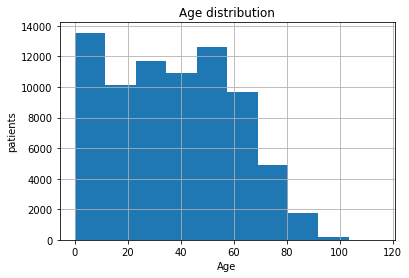

In [80]:

df['Age'].hist()
plt.ylabel('patients')
plt.xlabel('Age')
plt.title('Age distribution')


**Rightly skewed**

#plotting the count of each Neighbourhood

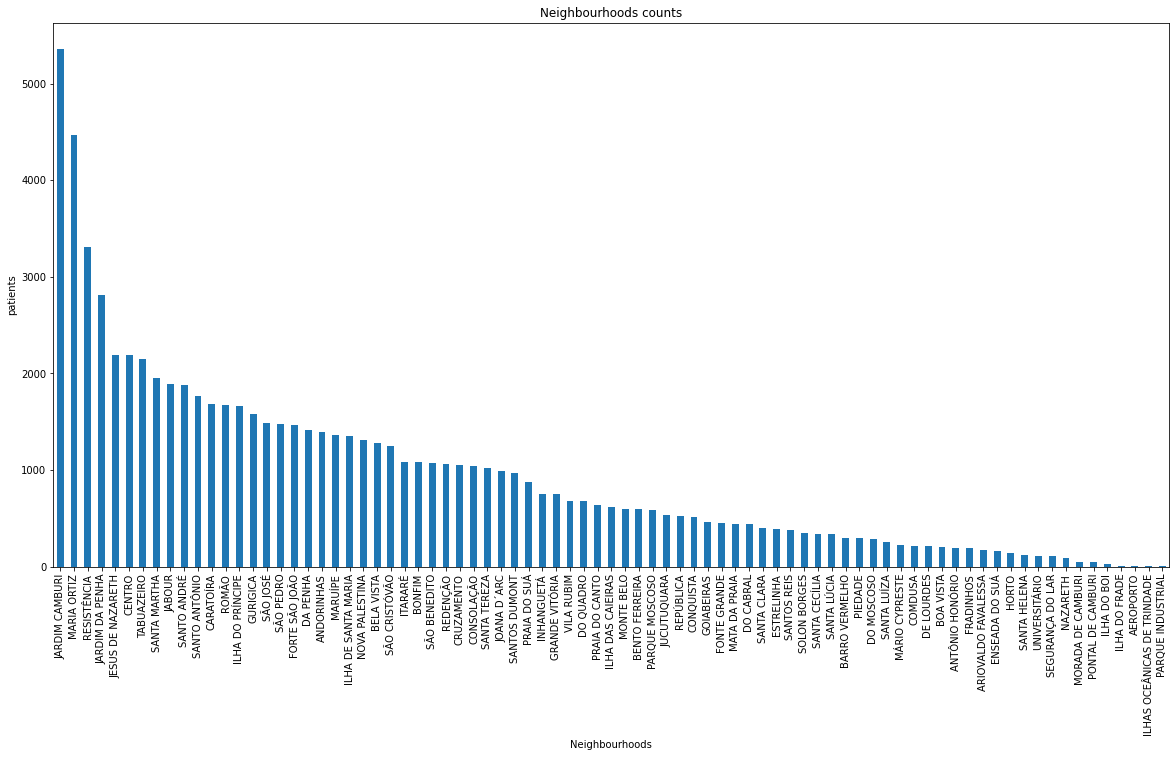

In [81]:

df['Neighbourhood'].value_counts().plot(kind='bar',figsize=(20,10))
plt.ylabel('patients')
plt.xlabel('Neighbourhoods')
plt.title('Neighbourhoods counts')
plt.show()

#plotting the count of each disease


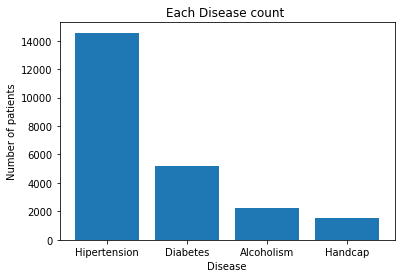

In [82]:

plt.bar([1,2,3,4],[df['Hipertension'].sum(),
                   df['Diabetes'].sum()
                   ,df['Alcoholism'].sum(),
                   df['Handcap'].sum()],
tick_label=['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'])
plt.xlabel('Disease')
plt.ylabel('Number of patients')
plt.title("Each Disease count ")
plt.show()

**many patients suffer from hypertension**

In [83]:
df.groupby('Gender')['Age'].mean()

Gender
F    38.846769
M    33.659495
Name: Age, dtype: float64

#plotting gender columns with respect to other columns


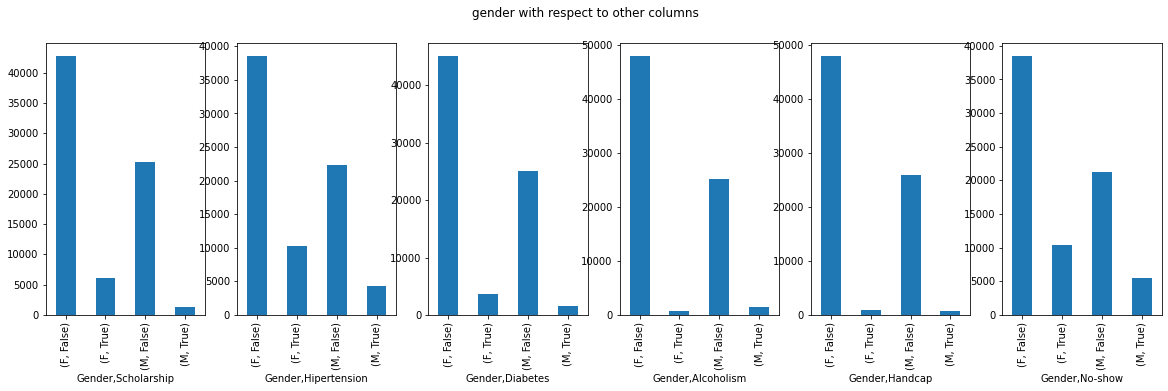

In [84]:

figbi,axesbi=plt.subplots(1,6,figsize=(20,5))
plt.suptitle('gender with respect to other columns')
df.groupby('Gender')['Scholarship'].value_counts().plot(kind='bar',ax=axesbi[0])
df.groupby('Gender')['Hipertension'].value_counts().plot(kind='bar',ax=axesbi[1])
df.groupby('Gender')[ 'Diabetes'].value_counts().plot(kind='bar',ax=axesbi[2])
df.groupby('Gender')[ 'Alcoholism'].value_counts().plot(kind='bar',ax=axesbi[3])
df.groupby('Gender')[ 'Handcap'].value_counts().plot(kind='bar',ax=axesbi[4])
df.groupby('Gender')[ 'No-show'].value_counts().plot(kind='bar',ax=axesbi[5])




**females counts more than males in alot of features**

#Is receiving a SMS has an effect on showing?


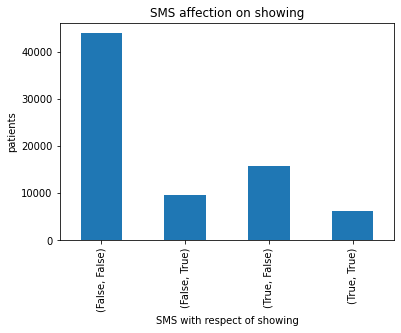

In [85]:
df.groupby('SMS_received')['No-show'].value_counts().plot(kind='bar')
plt.ylabel('patients')
plt.xlabel('SMS with respect of showing')
plt.title('SMS affection on showing')
plt.show()

**It doesnt really affect**

#plotting disease columns with respect to showing

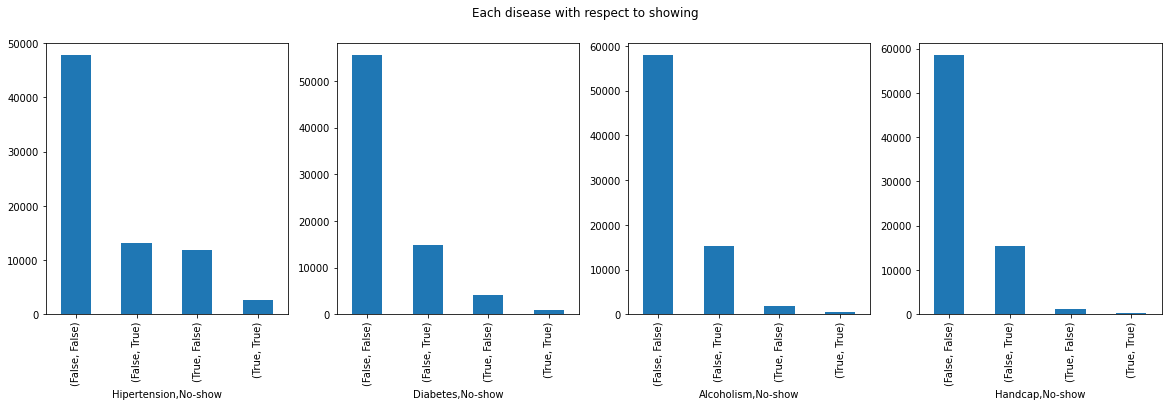

In [86]:
figbi,axesbi=plt.subplots(1, 4,figsize=(20,5))
plt.suptitle('Each disease with respect to showing')
df.groupby('Hipertension')['No-show'].value_counts().plot(kind='bar',ax=axesbi[0])
df.groupby('Diabetes')['No-show'].value_counts().plot(kind='bar',ax=axesbi[1])
df.groupby('Alcoholism')['No-show'].value_counts().plot(kind='bar',ax=axesbi[2])
df.groupby('Handcap')['No-show'].value_counts().plot(kind='bar',ax=axesbi[3])


hypertension patients tend to show more than the other

#Does age affect showing?

In [87]:
show=df['No-show']==True
no_show=df['No-show']==False

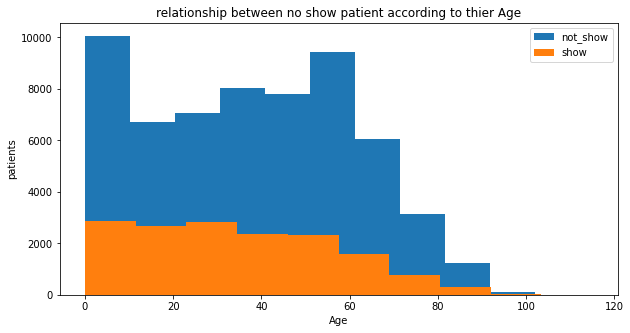

In [88]:
plt.subplots(figsize=(10,5))
df.Age[no_show].plot(kind= 'hist', label= 'not_show')
df.Age[show].plot(kind= 'hist', label= 'show')

plt.legend()
plt.ylabel('patients')
plt.xlabel('Age')
plt.title('relationship between no show patient according to thier Age')
plt.show()

**It seems affecting**

#which month did most patirnts show?

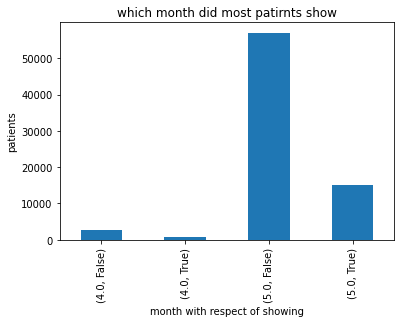

In [89]:
df.groupby('Appointment_MONTH')['No-show'].value_counts().plot(kind='bar')
plt.ylabel('patients')
plt.xlabel('month with respect of showing')
plt.title('which month did most patirnts show')
plt.show()

**May**

#which day in month did most patirnts show in  bar


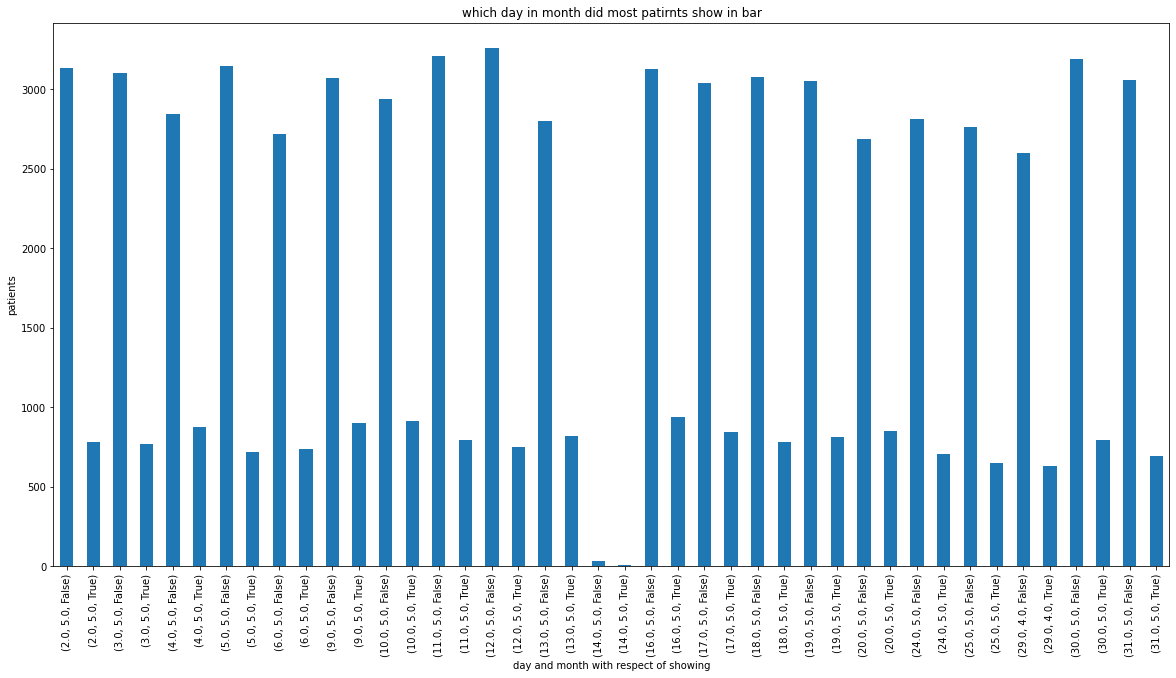

In [90]:

df.groupby(['Appointment_DAY','Appointment_MONTH'])['No-show'].value_counts().plot(kind='bar',figsize=(20,10))
plt.ylabel('patients')
plt.xlabel('day and month with respect of showing')
plt.title('which day in month did most patirnts show in bar')
plt.show()

16th of may

**________________________________________________________**

<a id='conclusions'></a>
## Conclusions

>1)Most patients didn't show to the appointment

>2)Most of the patients come from Jardim Camburi, Maria Ortiz, Jardim Da Penha, Resestencia and Itarare neighbourhood  respectively from the highest to lowest .

>3)Age is rightly skewed,this means that when age increase number of patients decrease.Most patients age from 0 to 8 ,so more pediatricians are needed.

>4)More than 20000 suffer from Hipertension ,which is very higher than any disease.Then come Diabetes,Alcoholism,and Handcap from hightest to lowest .

>5)More females got accepted in scholarship than males.

>6)Females tended to show more than men
7)More females suffer from Hipertension ,Diadetes,and Handcap than males.However males suffer more from Alcoholism than females.

>8)Patients that suffer from Hipertension showed at the appointment more than 
Diabetes,Alcoholism, and Handcap respectively.

>9)Patients who didnt received SMS showed more than who received.

>10)Younger patients tended show more then old patients.

>11)Most patients tended to show in may then any month.

>12)Most patients tended to show in 16th of may then any day.






**LIMITATIONS:**



.PatientId are AppointmentID	unnecessery.

.ScheduledDay	and AppointmentDay came with wronge datatypes.

.Scholarship,Hipertension	,Diabetes	,Alcoholism	,Handcap	SMS_received, and No-show came with wronge datatypes


.Some schedule dates were switched with appointment dates.




